# Aclaracion

El notebook actual tratara de manera exclusiva el desarrollo, entrenamiento y validacion del modelo de clasificacion para este conjunto de datos

# Importar librerias a utilizar

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score

# Libreria y metodo para guardar los modelos entrenados
from joblib import dump
import os

In [2]:
route_dataset = '../dataset/ready_dataset.csv'
dataset_df = pd.read_csv(route_dataset)

dataset_df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.0
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,...,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802,1.0
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,...,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730,1.0
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,...,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435,1.0
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,...,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650,1.0
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,...,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856,1.0


# Division del conjunto de datos

In [3]:
X = dataset_df.drop(columns = ['diagnosis'])
y = dataset_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=42)   # <== Aplico un factor de randomizacion en la division de los datos

In [4]:
X_train.shape

(455, 30)

In [5]:
X_test.shape

(114, 30)

In [6]:
y_train.shape

(455,)

In [7]:
y_test.shape

(114,)

# Instanciacion del modelo de clasificacion

## Modelo clasificador basado en RandomForest

In [8]:
# Voy a probar con un primer modelo de clasificacion basado en RandomForest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

### Pruebo el rendimiento del modelo RandomForestClassifier con Cross Validation


In [9]:
scores = cross_val_score(model, X_train, y_train, cv = 5)
print('Puntuaciones de cada fold en la validacion:', scores)
print('Puntuacion media de los folds en la validacion:', scores.mean())

Puntuaciones de cada fold en la validacion: [0.94505495 0.94505495 0.97802198 0.93406593 0.94505495]
Puntuacion media de los folds en la validacion: 0.9494505494505494


### Entrenamiento del modelo

In [10]:
# Entreno el modelo 
model.fit(X_train, y_train)

RandomForestClassifier()

### Evaluacion del modelo RandomForestClassifier entrenado

In [11]:
# Muestro el coeficiente de R2 para el modelo entrenado en relacion con el subconjunto de testing
model.score(X_test, y_test)

0.956140350877193

In [12]:
# Genero predicciones para el conjunto de testing
y_pred = model.predict(X_test)

In [13]:
# Evaluo el rendimiento del modelo en una matriz de confusion y un cuadro de clasificacion
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_rf = confusion_matrix(y_test, y_pred)
print(conf_matrix_rf)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[69  2]
 [ 3 40]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        71
         1.0       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



El rendimiento obtenido con un modelo clasificador basado en RandomForest es muy bueno, para el tamano inicial que teniamos del conjunto de datos.
Si es cierto que, para fines medicos, siempre se busca un rendimiento muy muy bueno, independientemente de que el modelo sea unicamente orientativo. En este caso, el rendimiento es bastante bueno para fines orientativos.


Por otro lado, podemos ver un poco menos de eficiencia al predecir la clase '1', que es la que nos interesa. Esto puede deberse a que, en el conjunto de testing, el registro de ejemplos que clasifican como tumor Maligno es bastante mas 
pequeno que el registro para tumores benignos. 

In [14]:
# Guardo el modelo final
saving_model__route = '../trained_models/'

if not os.path.exists(saving_model__route):
    os.mkdir(saving_model__route)
    
dump(model, os.path.join(saving_model__route, 'rfc.joblib'))
print('Modelo guardado con exito!')

Modelo guardado con exito!


## Modelo clasificador basado en SVM

In [15]:
# Voy a probar ahora con un segundo modelo de clasificacion basado en Support Vector Machine
from sklearn.svm import SVC

model = SVC(kernel = 'rbf')

### Pruebo el rendimiento del modelo SVC con Cross Validation (kernel 'poly')

In [16]:
scores = cross_val_score(model, X_train, y_train, cv = 5)
print('Puntuaciones de cada fold en la validacion:', scores)
print('Puntuacion media de los folds en la validacion:', scores.mean())

Puntuaciones de cada fold en la validacion: [0.97802198 0.96703297 0.98901099 0.98901099 0.94505495]
Puntuacion media de los folds en la validacion: 0.9736263736263737


### Pruebo el rendimiento del modelo SVC con Cross Validation (kernel 'linear')

In [17]:
scores = cross_val_score(model, X_train, y_train, cv = 5)
print('Puntuaciones de cada fold en la validacion:', scores)
print('Puntuacion media de los folds en la validacion:', scores.mean())

Puntuaciones de cada fold en la validacion: [0.97802198 0.96703297 0.98901099 0.98901099 0.94505495]
Puntuacion media de los folds en la validacion: 0.9736263736263737


### Pruebo el rendimiento del modelo SVC con Cross Validation (kernel 'rbf')

In [18]:
scores = cross_val_score(model, X_train, y_train, cv = 5)
print('Puntuaciones de cada fold en la validacion:', scores)
print('Puntuacion media de los folds en la validacion:', scores.mean())

Puntuaciones de cada fold en la validacion: [0.97802198 0.96703297 0.98901099 0.98901099 0.94505495]
Puntuacion media de los folds en la validacion: 0.9736263736263737


### Pruebo el rendimiento del modelo SVC con Cross Validation (kernel 'sigmoid')

In [19]:
scores = cross_val_score(model, X_train, y_train, cv = 5)
print('Puntuaciones de cada fold en la validacion:', scores)
print('Puntuacion media de los folds en la validacion:', scores.mean())

Puntuaciones de cada fold en la validacion: [0.97802198 0.96703297 0.98901099 0.98901099 0.94505495]
Puntuacion media de los folds en la validacion: 0.9736263736263737


### Entrenamiento del modelo

In [20]:
# Basandome en los resultados obtenidos con diferentes kernels, entreno un modelo clasificar basado en SVM con kernel 'rbf' (por defecto)
model.fit(X_train, y_train)

SVC()

### Evaluacion del modelo SVC entrenado

In [21]:
# Muestro el coeficiente de R2 para el modelo entrenado en relacion con el subconjunto de testing
model.score(X_test, y_test)

0.9736842105263158

In [22]:
# Genero predicciones para el conjunto de testing
y_pred = model.predict(X_test)

In [23]:
# Evaluo el rendimiento del modelo en una matriz de confusion y un cuadro de clasificacion
conf_matrix_svc = confusion_matrix(y_test, y_pred)
print(conf_matrix_svc)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



El rendimiento del modelo clasificador basado en SVM con kernel 'rbf' es ligeramente superior al obtenido con el modelo basado en RandomForest al clasificar datos no vistos durante el entrenamiento, generando tan solo 3 valores mal predichos (1 falso negativo, y 2 falsos positivos).

In [24]:
# Guardo el modelo final
saving_model__route = '../trained_models/'

if not os.path.exists(saving_model__route):
    os.mkdir(saving_model__route)
    
dump(model, os.path.join(saving_model__route, 'svc.joblib'))
print('Modelo guardado con exito!')

Modelo guardado con exito!


## Modelo clasificador basado en Perceptron multicapa

In [25]:
# Voy a definir un tercer modelo de clasificacion basado en Multilayer Perceptron
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter = 420, alpha=0.001)

### Pruebo el rendimiento del modelo MLPClassifier con Cross Validation

In [26]:
scores = cross_val_score(model, X_train, y_train, cv = 5)
print('Puntuaciones de cada fold en la validacion:', scores)
print('Puntuacion media de los folds en la validacion:', scores.mean())

Puntuaciones de cada fold en la validacion: [0.98901099 0.97802198 0.97802198 0.98901099 0.93406593]
Puntuacion media de los folds en la validacion: 0.9736263736263737


### Entrenamiento del modelo

In [27]:
model.fit(X_train, y_train)

MLPClassifier(alpha=0.001, max_iter=420)

### Evaluacion del modelo MLPClassifier entrenado

In [28]:
# Muestro el coeficiente de R2 para el modelo entrenado en relacion con el subconjunto de testing
model.score(X_test, y_test)

0.9736842105263158

In [29]:
# Genero predicciones para el conjunto de testing
y_pred = model.predict(X_test)

In [30]:
# Evaluo el rendimiento del modelo en una matriz de confusion y un cuadro de clasificacion
conf_matrix_mlp = confusion_matrix(y_test, y_pred)
print(conf_matrix_mlp)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



El rendimiento de la red neuronal es casi perfecto, igualando en coeficientes de metricas al modelo clasificador basado en SVM con kernel ('rbf')

In [31]:
# Guardo el modelo final
saving_model__route = '../trained_models/'

if not os.path.exists(saving_model__route):
    os.mkdir(saving_model__route)
    
dump(model, os.path.join(saving_model__route, 'mlp.joblib'))
print('Modelo guardado con exito!')

Modelo guardado con exito!


## Enfrento los resultados de los tres modelos

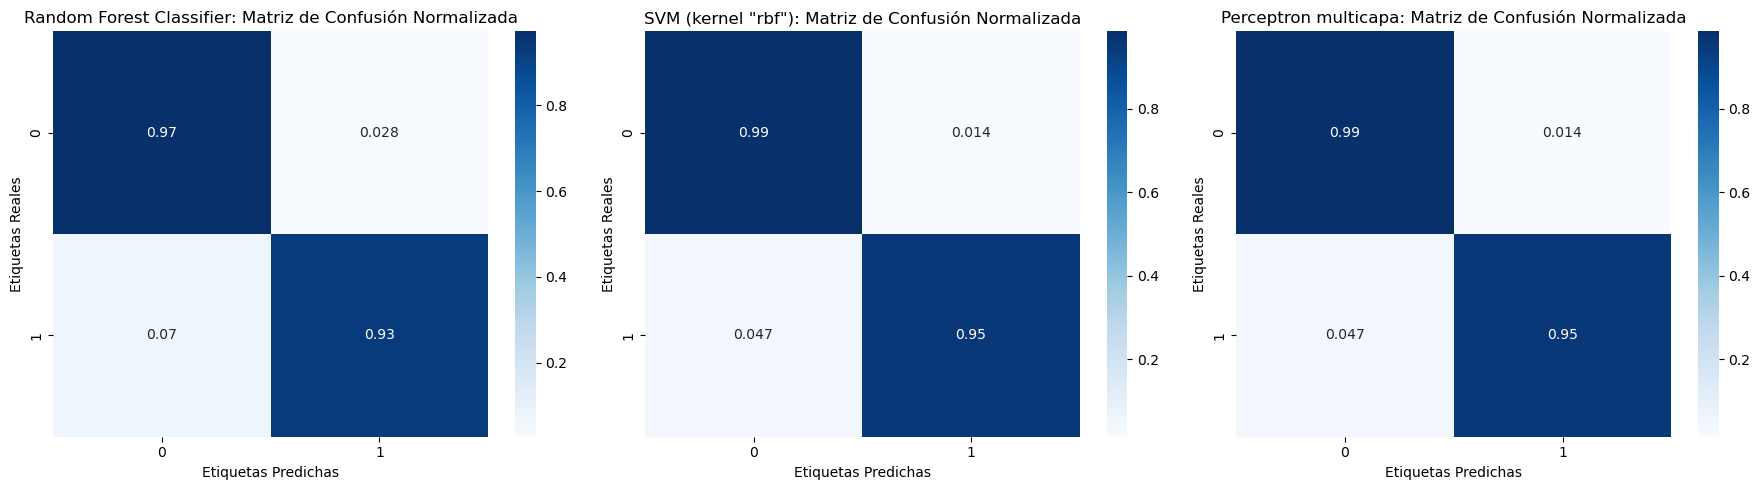

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = conf_matrix_rf
cm2 = conf_matrix_svc
cm3 = conf_matrix_mlp

# Normalizo las matrices de confusión para obtener frecuencias en lugar de conteos
cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
cm3 = cm3.astype('float') / cm3.sum(axis=1)[:, np.newaxis]

# Grafico las matrices de confusión
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm1, annot=True, ax=ax[0], cmap='Blues')
ax[0].set_title('Random Forest Classifier: Matriz de Confusión Normalizada')
ax[0].set_ylabel('Etiquetas Reales')
ax[0].set_xlabel('Etiquetas Predichas')

sns.heatmap(cm2, annot=True, ax=ax[1], cmap='Blues')
ax[1].set_title('SVM (kernel "rbf"): Matriz de Confusión Normalizada')
ax[1].set_ylabel('Etiquetas Reales')
ax[1].set_xlabel('Etiquetas Predichas')

sns.heatmap(cm3, annot=True, ax=ax[2], cmap='Blues')
ax[2].set_title('Perceptron multicapa: Matriz de Confusión Normalizada')
ax[2].set_ylabel('Etiquetas Reales')
ax[2].set_xlabel('Etiquetas Predichas')


plt.tight_layout()
plt.show()